# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [1]:
import numpy as np
import pandas as pd


data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Q. Define the problem domain

Predict whether a patient will have a stroke or not based on their history and different features.

### Q. Identify candidate questions for your machine learning project

The goal of this machine learning project is to find the best machine learning model which would use different features about a patient to predict whether the patient will have a stroke or not.

Label: 'stroke' column with values: 1 - had a stroke, 0 - no stroke.

Dataset that the model will be trained with includes discrete (e.g. 'gender', 'hypertension') and continuous (e.g. 'bmi', 'avg_glucose_level') values.
Dataset has some missing values which will need to be addressed.

In [2]:
data.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
77     Female  13.0  0             0              No            children       Rural           85.81              18.6  Unknown          0         1
49605  Male    63.0  0             0              Yes           Private        Urban           74.39              31.0  formerly smoked  0         1
49661  Male    53.0  0             0              Yes           Govt_job       Urban           85.17              29.2  never smoked     0         1
49646  Male    72.0  0             1              Yes           Self-employed  Rural           113.63             26.5  Unknown          0         1
49645  Male    58.0  0             0              No            Private        Rural           76.22              22.2  formerly smoked  0         1
                                                                                                               

In [3]:
# Cardinality
for cname in data.columns:
  print(cname + " : " + str(data[cname].value_counts().count()))

id : 5110
gender : 3
age : 104
hypertension : 2
heart_disease : 2
ever_married : 2
work_type : 5
Residence_type : 2
avg_glucose_level : 3979
bmi : 418
smoking_status : 4
stroke : 2


In [4]:
# Setting 'id' as an index
data.set_index('id', inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


GETTING RID OF MISSING VALUES

In [5]:
print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
# Replacing missing bmi values with mean bmi
bmi_mean = data['bmi'].mean()
data['bmi'].fillna(bmi_mean, inplace=True)

ENCODING

In [7]:
# One-hot encoding 'gender' column
gender_dummies = pd.get_dummies(data['gender'], prefix='gender')
gender_dummies.drop(gender_dummies.columns[2], axis=1, inplace=True)

data = pd.concat([data, gender_dummies], axis=1)
data = data.drop(['gender'], axis=1)
data.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male
id,,,,,,,,,,,,
9046,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0,1
51676,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1,0
31112,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1
60182,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,0
1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1,0


In [8]:
# One-hot encoding 'work_type' column
work_type_dummies = pd.get_dummies(data['work_type'], prefix='work')
work_type_dummies.drop(work_type_dummies.columns[0], axis=1, inplace=True)

data = pd.concat([data, work_type_dummies], axis=1)
data = data.drop(['work_type'], axis=1)
data.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,work_Never_worked,work_Private,work_Self-employed,work_children
id,,,,,,,,,,,,,,,
9046,67.0,0,1,Yes,Urban,228.69,36.600000,formerly smoked,1,0,1,0,1,0,0
51676,61.0,0,0,Yes,Rural,202.21,28.893237,never smoked,1,1,0,0,0,1,0
31112,80.0,0,1,Yes,Rural,105.92,32.500000,never smoked,1,0,1,0,1,0,0
60182,49.0,0,0,Yes,Urban,171.23,34.400000,smokes,1,1,0,0,1,0,0
1665,79.0,1,0,Yes,Rural,174.12,24.000000,never smoked,1,1,0,0,0,1,0


In [9]:
# One-hot encoding 'smoking_status' column
smoking_status_dummies = pd.get_dummies(data['smoking_status'], prefix='smoking')
smoking_status_dummies.drop(smoking_status_dummies.columns[0], axis=1, inplace=True)

data = pd.concat([data, smoking_status_dummies], axis=1)
data = data.drop(['smoking_status'], axis=1)
data.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
id,,,,,,,,,,,,,,,,,
9046,67.0,0,1,Yes,Urban,228.69,36.600000,1,0,1,0,1,0,0,1,0,0
51676,61.0,0,0,Yes,Rural,202.21,28.893237,1,1,0,0,0,1,0,0,1,0
31112,80.0,0,1,Yes,Rural,105.92,32.500000,1,0,1,0,1,0,0,0,1,0
60182,49.0,0,0,Yes,Urban,171.23,34.400000,1,1,0,0,1,0,0,0,0,1
1665,79.0,1,0,Yes,Rural,174.12,24.000000,1,1,0,0,0,1,0,0,1,0


In [10]:
# Encoding 'ever_married' column
mapping = {'No': 0, 'Yes': 1}
data['ever_married'] = data['ever_married'].replace(mapping)
data.tail()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
id,,,,,,,,,,,,,,,,,
18234,80.0,1,0,1,Urban,83.75,28.893237,0,1,0,0,1,0,0,0,1,0
44873,81.0,0,0,1,Urban,125.20,40.000000,0,1,0,0,0,1,0,0,1,0
19723,35.0,0,0,1,Rural,82.99,30.600000,0,1,0,0,0,1,0,0,1,0
37544,51.0,0,0,1,Rural,166.29,25.600000,0,0,1,0,1,0,0,1,0,0
44679,44.0,0,0,1,Urban,85.28,26.200000,0,1,0,0,0,0,0,0,0,0


In [11]:
# Encoding 'Residence_type' column
mapping = {'Urban': 0, 'Rural': 1}
data['Residence_type'] = data['Residence_type'].replace(mapping)
data.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
id,,,,,,,,,,,,,,,,,
9046,67.0,0,1,1,0,228.69,36.600000,1,0,1,0,1,0,0,1,0,0
51676,61.0,0,0,1,1,202.21,28.893237,1,1,0,0,0,1,0,0,1,0
31112,80.0,0,1,1,1,105.92,32.500000,1,0,1,0,1,0,0,0,1,0
60182,49.0,0,0,1,0,171.23,34.400000,1,1,0,0,1,0,0,0,0,1
1665,79.0,1,0,1,1,174.12,24.000000,1,1,0,0,0,1,0,0,1,0


In [12]:
renamed_data = data.rename({'gender_Female': 'female', 'gender_Male': 'male', 
                           'work_Never_worked': 'work_never', 'work_Private': 'work_private', 'work_Self-employed': 'work_self_employed',
                           'smoking_formerly smoked' : 'former_smoker', 'smoking_never smoked': 'non_smoker', 'smoking_smokes': 'smoker'},
                           axis=1)
renamed_data.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,female,male,work_never,work_private,work_self_employed,work_children,former_smoker,non_smoker,smoker
id,,,,,,,,,,,,,,,,,
9046,67.0,0,1,1,0,228.69,36.600000,1,0,1,0,1,0,0,1,0,0
51676,61.0,0,0,1,1,202.21,28.893237,1,1,0,0,0,1,0,0,1,0
31112,80.0,0,1,1,1,105.92,32.500000,1,0,1,0,1,0,0,0,1,0
60182,49.0,0,0,1,0,171.23,34.400000,1,1,0,0,1,0,0,0,0,1
1665,79.0,1,0,1,1,174.12,24.000000,1,1,0,0,0,1,0,0,1,0


In [13]:
# Cleaned and transformed dataset
df = renamed_data[['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'female',
       'male', 'work_never', 'work_private', 'work_self_employed',
       'work_children', 'former_smoker', 'non_smoker', 'smoker', 'stroke']]

In [14]:
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,female,male,work_never,work_private,work_self_employed,work_children,former_smoker,non_smoker,smoker,stroke
id,,,,,,,,,,,,,,,,,
9046,67.0,0,1,1,0,228.69,36.600000,0,1,0,1,0,0,1,0,0,1
51676,61.0,0,0,1,1,202.21,28.893237,1,0,0,0,1,0,0,1,0,1
31112,80.0,0,1,1,1,105.92,32.500000,0,1,0,1,0,0,0,1,0,1
60182,49.0,0,0,1,0,171.23,34.400000,1,0,0,1,0,0,0,0,1,1
1665,79.0,1,0,1,1,174.12,24.000000,1,0,0,0,1,0,0,1,0,1


### Q. Generate a descriptive statistics report for the columns in your dataset

In [15]:
stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
Residence_type,5110.0,0.491977,0.499985,0.00,0.000,0.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
female,5110.0,0.585910,0.492612,0.00,0.000,1.000,1.00,1.00
male,5110.0,0.413894,0.492578,0.00,0.000,0.000,1.00,1.00
work_never,5110.0,0.004305,0.065480,0.00,0.000,0.000,0.00,1.00


In [16]:
# Calculating the number of values in the label column 'stroke'

df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

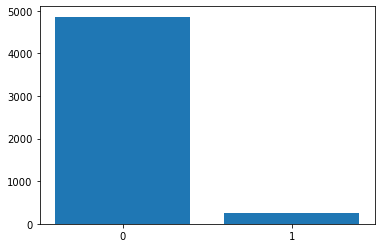

In [17]:
# distribution
import matplotlib.pyplot as plt
plt.figure()
stroke_counts = df['stroke'].value_counts()
ax = plt.bar(stroke_counts.index.astype(str), stroke_counts)
plt.show()

# Part 2: Data Preparation

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5110 non-null   float64
 1   hypertension        5110 non-null   int64  
 2   heart_disease       5110 non-null   int64  
 3   ever_married        5110 non-null   int64  
 4   Residence_type      5110 non-null   int64  
 5   avg_glucose_level   5110 non-null   float64
 6   bmi                 5110 non-null   float64
 7   female              5110 non-null   uint8  
 8   male                5110 non-null   uint8  
 9   work_never          5110 non-null   uint8  
 10  work_private        5110 non-null   uint8  
 11  work_self_employed  5110 non-null   uint8  
 12  work_children       5110 non-null   uint8  
 13  former_smoker       5110 non-null   uint8  
 14  non_smoker          5110 non-null   uint8  
 15  smoker              5110 non-null   uint8  
 16  st

Q. Is there any correlation in the data? How would you decide which columns to keep?

In [19]:
# Calculating label column 'stroke' correlations with continuous variables
corr = df[['age','avg_glucose_level','bmi', 'stroke']].corr()
corr

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.325942,0.245257
avg_glucose_level,0.238171,1.000000,0.168751,0.131945
bmi,0.325942,0.168751,1.000000,0.038947
stroke,0.245257,0.131945,0.038947,1.000000


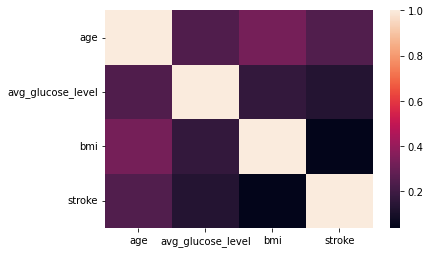

In [20]:
# Visualizing correlations

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.heatmap(corr)
plt.show()

NORMALIZATION

In [21]:
mu = stats['mean']
sigma = stats['std']
# Calculating z-score
normdata = (df - mu)/sigma
normdata.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,female,male,work_never,work_private,work_self_employed,work_children,former_smoker,non_smoker,smoker,stroke
id,,,,,,,,,,,,,,,,,
9046,1.051331,-0.328570,4.184622,0.723813,-0.983983,2.706111,1.001136e+00,-1.189394,1.189873,-0.06575,0.864212,-0.436838,-0.394074,2.184737,-0.766699,-0.427271,4.417948
51676,0.785993,-0.328570,-0.238923,0.723813,1.016078,2.121351,-5.999632e-15,0.840600,-0.840261,-0.06575,-1.156897,2.288731,-0.394074,-0.457631,1.304037,-0.427271,4.417948
31112,1.626231,-0.328570,4.184622,0.723813,1.016078,-0.005028,4.685314e-01,-1.189394,1.189873,-0.06575,0.864212,-0.436838,-0.394074,-0.457631,1.304037,-0.427271,4.417948
60182,0.255317,-0.328570,-0.238923,0.723813,-0.983983,1.437217,7.153482e-01,0.840600,-0.840261,-0.06575,0.864212,-0.436838,-0.394074,-0.457631,-0.766699,2.339975,4.417948
1665,1.582008,3.042899,-0.238923,0.723813,1.016078,1.501038,-6.356489e-01,0.840600,-0.840261,-0.06575,-1.156897,2.288731,-0.394074,-0.457631,1.304037,-0.427271,4.417948


Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [22]:
# Splitting data into training and testing

x = df.iloc[:, :16]
y = df.loc[:, ['stroke']]

from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Defining two different hyperparameters for Random Forest
ntree1, ntree2 = 50,100

for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC(dual=False)]:
  model = algo
  model.fit(xtrain, ytrain.values.ravel())
  predictions = model.predict(xtest)
  print(accuracy_score(predictions, ytest))

0.9628180039138943
0.9608610567514677
0.5528375733855186
0.9099804305283757
0.9549902152641878
0.9647749510763209


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [24]:
# Based on Accuracy, LinearSVC is the best model

final_model = LinearSVC(dual=False)
final_model.fit(xtrain,ytrain.values.ravel())
p = final_model.predict(xtest)
print(accuracy_score(p, ytest))

0.9647749510763209


In [25]:
#Confusion matrix

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(ytest, p)
print(matrix)

[[986   0]
 [ 36   0]]
